# Impfungen in Deutschland

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams.update({'axes.grid': True,
                     'grid.linestyle': ':',
                     'axes.spines.bottom': False,
                     'axes.spines.left': False,
                     'axes.spines.right': False,
                     'axes.spines.top': False})

## Aktuelle Daten des RKI

In [2]:
url = "https://raw.githubusercontent.com/robert-koch-institut/COVID-19-Impfungen_in_Deutschland/master/Aktuell_Deutschland_Landkreise_COVID-19-Impfungen.csv"
data = pd.read_csv(url, sep=",")

/Users/mg14/anaconda3/envs/npy/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data

,Impfdatum,LandkreisId_Impfort,Altersgruppe,Impfschutz,Anzahl
0,2020-12-27,1003,18-59,1,9
1,2020-12-27,1003,60+,1,19
2,2020-12-27,1053,18-59,1,13
3,2020-12-27,1053,60+,1,200
4,2020-12-27,1055,18-59,1,20
...,...,...,...,...,...
734189,2022-01-13,u,12-17,3,71
734190,2022-01-13,u,18-59,1,17
734191,2022-01-13,u,18-59,2,60
734192,2022-01-13,u,18-59,3,790


In [4]:
agg = pd.pivot_table(data, values="Anzahl", index=["Impfdatum","Altersgruppe"], columns="Impfschutz", aggfunc=np.sum)
agg_avg = agg.loc[agg.index.levels[0][-7:]].mean(level=[1])

In [5]:
plt.rc('font', family='DejaVu Sans')

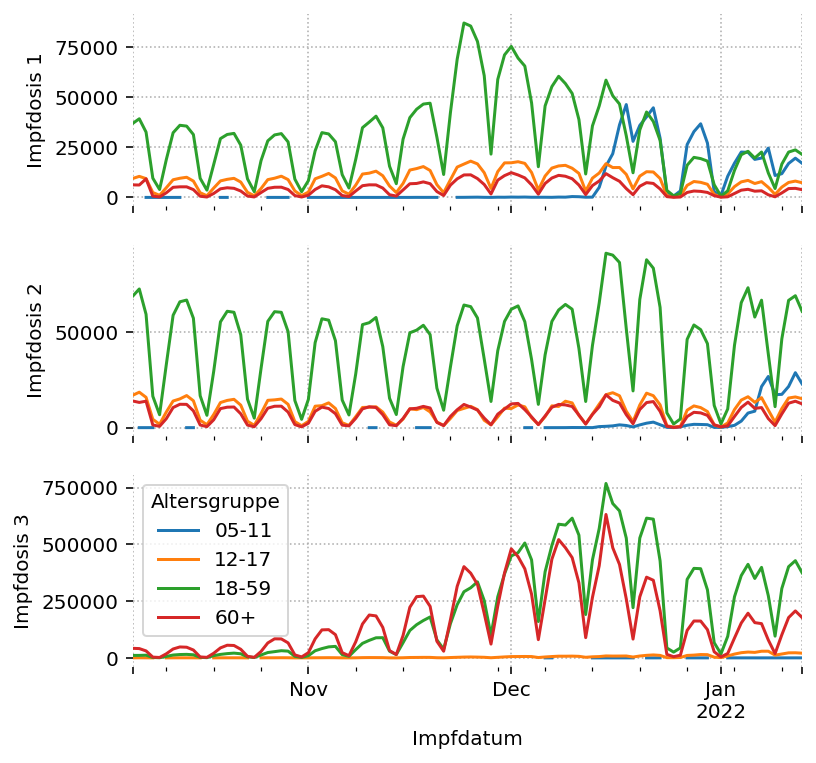

In [6]:
fig, ax = plt.subplots(3,1, sharex=True,  figsize=(6,6))
ax = ax.flatten()
idx = pd.IndexSlice
for i,j in enumerate(agg.columns):
    y = agg.loc[:,j].unstack().iloc[-100:,:]
    y.index = pd.DatetimeIndex(y.index)
    y.plot(ax=ax[i])
    ax[i].set_ylabel(f"Impfdosis {j}")
    if j < 3:
        ax[i].get_legend().remove()

    #ax[i].set_ylabel("Dosen")
    #ax[i].set_yscale("log")


In [7]:
latest = data.loc[data.Impfdatum==data.Impfdatum.values[-1],:]
#agg = pd.pivot_table(latest, values="Anzahl", index="Altersgruppe", columns="Impfschutz", aggfunc=np.sum)

Text(0.5, 0, 'Altersgruppe')

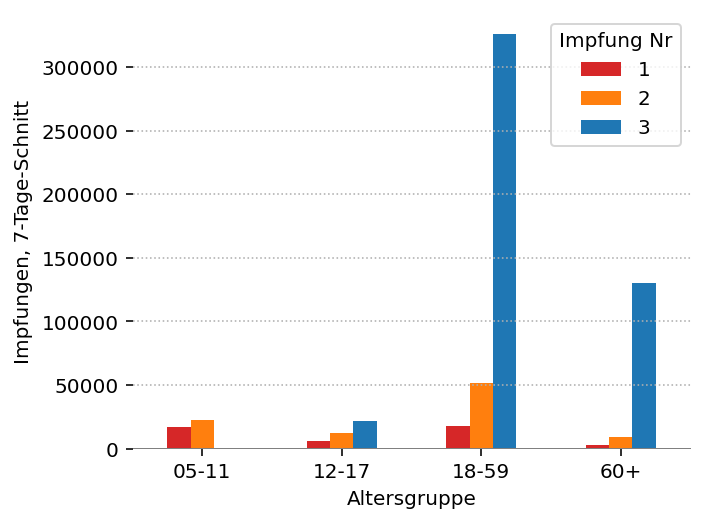

In [8]:
plt.rcParams['figure.facecolor']='white'
agg_avg.plot.bar(figsize=(5,4), color=['C3','C1','C0'])
date = pd.to_datetime(data.Impfdatum.values[-1]).strftime('%d.%m.%y')
plt.ylabel(f"Impfungen, 7-Tage-Schnitt")
plt.xticks(rotation=0)
plt.grid(axis='x', ls="")
plt.axhline(0, color='gray')
plt.legend(title="Impfung Nr")
plt.xlabel("Altersgruppe")

In [9]:
(agg_avg  / agg_avg.values.sum() * 100).round(1)

Impfschutz,1,2,3
Altersgruppe,,,
05-11,2.8,3.6,0.0
12-17,1.0,2.0,3.6
18-59,2.9,8.3,52.8
60+,0.5,1.4,21.1


## Impfschutz pro Altersgruppe
VE Daten von UKHSA.
Altersspezifisches Risiko

In [10]:
hr = np.array([1e-3, 2e-3, 2e-2, 1.6e-1]) * 0.5
ve = np.array([0.5, 0.5-0.25, 0.25-0.08])#np.array([1-0.08, (1-0.04)*0.08, 0.99*0.2])
#ve = np.array([76.7, 83.7*(100-76.7)/100, 96.9*(100-67.6)/100])/100.
rr =  agg_avg / agg_avg * (hr.reshape(-1,1) * ve.reshape(1,-1))
hosp = agg_avg * rr

In [11]:
rr

Impfschutz,1,2,3
Altersgruppe,,,
05-11,0.00025,0.000125,0.000085
12-17,0.00050,0.000250,0.000170
18-59,0.00500,0.002500,0.001700
60+,0.04000,0.020000,0.013600


Text(0.5, 0, 'Altersgruppe')

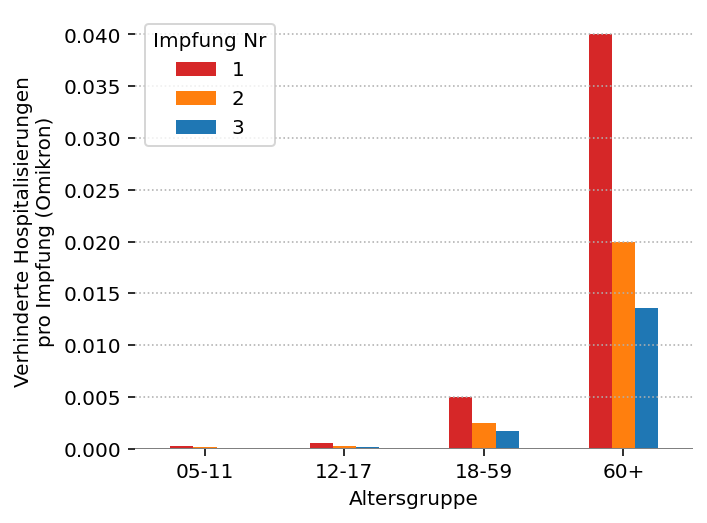

In [12]:
plt.rcParams['figure.facecolor']='white'
rr.plot.bar(figsize=(5,4),color=['C3','C1','C0'])
date = pd.to_datetime(data.Impfdatum.values[-1]).strftime('%d.%m.%y')
plt.ylabel(f"Verhinderte Hospitalisierungen\npro Impfung (Omikron)")
plt.xticks(rotation=0)
plt.grid(axis='x', ls="")
plt.axhline(0, color='gray')
plt.legend(title="Impfung Nr")
plt.xlabel("Altersgruppe")

Text(0.5, 0, 'Altersgruppe')

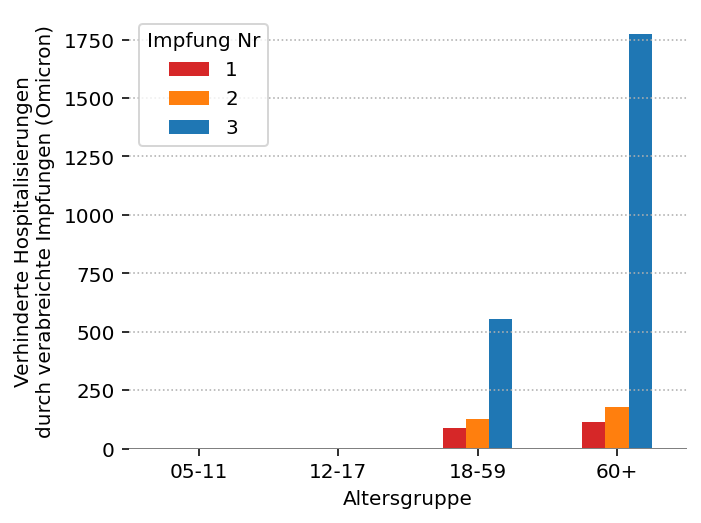

In [13]:
plt.rcParams['figure.facecolor']='white'
hosp.plot.bar(figsize=(5,4),color=['C3','C1','C0'])
date = pd.to_datetime(data.Impfdatum.values[-1]).strftime('%d.%m.%y')
plt.ylabel(f"Verhinderte Hospitalisierungen\ndurch verabreichte Impfungen (Omicron)")
plt.xticks(rotation=0)
plt.grid(axis='x', ls="")
plt.axhline(0, color='gray')
plt.legend(title="Impfung Nr")
plt.xlabel("Altersgruppe")

In [14]:
hosp

Impfschutz,1,2,3
Altersgruppe,,,
05-11,4.309500,2.787036,0.004262
12-17,3.041000,3.015643,3.719576
18-59,88.424286,128.211071,553.407800
60+,114.365714,178.588571,1772.276229


## Impfquote

In [15]:
rate = pd.read_csv("https://raw.githubusercontent.com/robert-koch-institut/COVID-19-Impfungen_in_Deutschland/master/Aktuell_Deutschland_Impfquoten_COVID-19.csv")

In [16]:
rate

,Datum,Bundesland,BundeslandId_Impfort,Impfungen_gesamt,Impfungen_gesamt_min1,Impfungen_gesamt_05bis11_min1,Impfungen_gesamt_voll,Impfungen_gesamt_boost,Impfquote_gesamt_min1,Impfquote_12bis17_min1,...,Impfquote_gesamt_voll,Impfquote_12bis17_voll,Impfquote_18plus_voll,Impfquote_18bis59_voll,Impfquote_60plus_voll,Impfquote_gesamt_boost,Impfquote_12bis17_boost,Impfquote_18plus_boost,Impfquote_18bis59_boost,Impfquote_60plus_boost
0,2022-01-13,Deutschland,0,157130393,62288513,653789,60272356,38156620,74.9,61.6,...,72.5,55.9,83.0,80.5,87.7,45.9,11.6,54.2,46.6,68.6
1,2022-01-13,Schleswig-Holstein,1,5871359,2289039,25745,2240676,1475165,78.6,76.7,...,77.0,69.0,88.6,86.7,92.0,50.7,10.5,59.8,50.4,76.5
2,2022-01-13,Hamburg,2,3602809,1485553,18744,1443938,780392,80.2,61.6,...,77.9,57.7,90.1,90.6,88.8,42.1,8.3,50.2,44.6,64.1
3,2022-01-13,Niedersachsen,3,15651205,6129586,62935,5920320,4032752,76.6,67.1,...,74.0,61.4,84.4,81.4,89.9,50.4,14.1,59.5,52.6,72.3
4,2022-01-13,Bremen,4,1471778,600144,5209,577195,342222,88.2,64.2,...,84.9,58.9,97.6,98.8,95.3,50.3,7.1,59.8,51.5,76.5
5,2022-01-13,Nordrhein-Westfalen,5,35547501,14127840,189391,13537461,8688033,78.8,67.5,...,75.5,62.0,86.2,84.1,90.4,48.5,13.0,57.4,49.4,72.9
6,2022-01-13,Hessen,6,11594923,4711113,47002,4476773,2657439,74.9,61.2,...,71.1,54.2,81.7,79.6,86.0,42.2,8.9,50.2,43.1,64.4
7,2022-01-13,Rheinland-Pfalz,7,7828945,3108995,30684,2942051,1944380,75.9,63.6,...,71.8,56.8,81.9,78.7,87.8,47.4,12.4,55.9,48.5,69.3
8,2022-01-13,Baden-Württemberg,8,20573813,8043263,76850,7856249,5151351,72.4,58.5,...,70.8,52.3,81.5,79.1,86.2,46.4,15.3,54.8,48.7,67.3
9,2022-01-13,Bayern,9,24232794,9528865,108561,9375019,5831781,72.5,62.9,...,71.3,57.5,81.5,79.4,85.7,44.4,10.5,52.5,44.6,68.5


## Bevölkerungsdaten des StaBu

In [17]:
pop = pd.read_csv("https://service.destatis.de/bevoelkerungspyramide/data/14_bevoelkerungsvorausberechnung_daten.csv", sep=";", index_col=[0,1,2])

In [18]:
pop

Bev  Bev_0_1  Bev_1_2  Bev_2_3  Bev_3_4  \
Variante Simulationsjahr mw                                              
0        1950            m   31962      542      518      483      460   
                         w   37384      512      492      459      439   
         1951            m   32198      541      535      520      486   
                         w   37587      513      507      495      463   
         1952            m   32409      544      536      533      520   
...                            ...      ...      ...      ...      ...   
27       2058            w   41277      321      326      330      335   
         2059            m   41407      336      341      346      351   
                         w   41205      319      324      328      333   
         2060            m   41390      333      338      344      349   
                         w   41135      316      321      326      331   

                             Bev_4_5  Bev_5_6  Bev_6_7  Bev_7_8  Bev_8_9  ...  \
Variante Simulationsjahr mw                                               ...   
0        1950            m       404      379      512      523      529  ...   
                         w       387      369      492      500      507  ...   
         1951            m       460      408      370      505      520  ...   
                         w       439      392      358      490      502  ...   
         1952            m       485      458      409      366      506  ...   
...                              ...      ...      ...      ...      ...  ...   
27       2058            w       338      341      343      345      346  ...   
         2059            m       355      359      362      364      366  ...   
                         w       337      340      343      345      347  ...   
         2060            m       354      358      361      364      366  ...   
                         w       335      339      342      345      347  ...   

                             Bev_90_91  Bev_91_92  Bev_92_93  Bev_93_94  \
Variante Simulationsjahr mw                                               
0        1950            m           0          0          0          0   
                         w           0          0          0          0   
         1951            m           0          0          0          0   
                         w           0          0          0          0   
         1952            m           0          0          0          0   
...                                ...        ...        ...        ...   
27       2058            w         323        297        270        235   
         2059            m         224        205        181        157   
                         w         312        294        267        238   
         2060            m         212        200        180        156   
                         w         296        285        264        236   

                             Bev_94_95  Bev_95_96  Bev_96_97  Bev_97_98  \
Variante Simulationsjahr mw                                               
0        1950            m           0          0          0          0   
                         w           0          0          0          0   
         1951            m           0          0          0          0   
                         w           0          0          0          0   
         1952            m           0          0          0          0   
...                                ...        ...        ...        ...   
27       2058            w         205        170        136        108   
         2059            m         131        108         85         63   
                         w         204        175        143        112   
         2060            m         133        109         88         68   
                         w         208        175        147        118   

                             Bev_98_99  Bev_99_100  
Variante 

In [19]:
pop=pop.rename(columns = {j:i for i,j in enumerate(pop.columns[1:])}).sum(level=(0,1))

In [20]:
pop_groups = np.array([pop.loc[(1,2021),np.arange(5,12)].sum(),
                       pop.loc[(1,2021),np.arange(12,18)].sum(),
                       pop.loc[(1,2021),np.arange(18,60)].sum(), 
                       pop.loc[(1,2021),np.arange(60,100)].sum()])

In [21]:
pop_groups

array([ 5329.,  4467., 45173., 24515.])

In [22]:
rate

,Datum,Bundesland,BundeslandId_Impfort,Impfungen_gesamt,Impfungen_gesamt_min1,Impfungen_gesamt_05bis11_min1,Impfungen_gesamt_voll,Impfungen_gesamt_boost,Impfquote_gesamt_min1,Impfquote_12bis17_min1,...,Impfquote_gesamt_voll,Impfquote_12bis17_voll,Impfquote_18plus_voll,Impfquote_18bis59_voll,Impfquote_60plus_voll,Impfquote_gesamt_boost,Impfquote_12bis17_boost,Impfquote_18plus_boost,Impfquote_18bis59_boost,Impfquote_60plus_boost
0,2022-01-13,Deutschland,0,157130393,62288513,653789,60272356,38156620,74.9,61.6,...,72.5,55.9,83.0,80.5,87.7,45.9,11.6,54.2,46.6,68.6
1,2022-01-13,Schleswig-Holstein,1,5871359,2289039,25745,2240676,1475165,78.6,76.7,...,77.0,69.0,88.6,86.7,92.0,50.7,10.5,59.8,50.4,76.5
2,2022-01-13,Hamburg,2,3602809,1485553,18744,1443938,780392,80.2,61.6,...,77.9,57.7,90.1,90.6,88.8,42.1,8.3,50.2,44.6,64.1
3,2022-01-13,Niedersachsen,3,15651205,6129586,62935,5920320,4032752,76.6,67.1,...,74.0,61.4,84.4,81.4,89.9,50.4,14.1,59.5,52.6,72.3
4,2022-01-13,Bremen,4,1471778,600144,5209,577195,342222,88.2,64.2,...,84.9,58.9,97.6,98.8,95.3,50.3,7.1,59.8,51.5,76.5
5,2022-01-13,Nordrhein-Westfalen,5,35547501,14127840,189391,13537461,8688033,78.8,67.5,...,75.5,62.0,86.2,84.1,90.4,48.5,13.0,57.4,49.4,72.9
6,2022-01-13,Hessen,6,11594923,4711113,47002,4476773,2657439,74.9,61.2,...,71.1,54.2,81.7,79.6,86.0,42.2,8.9,50.2,43.1,64.4
7,2022-01-13,Rheinland-Pfalz,7,7828945,3108995,30684,2942051,1944380,75.9,63.6,...,71.8,56.8,81.9,78.7,87.8,47.4,12.4,55.9,48.5,69.3
8,2022-01-13,Baden-Württemberg,8,20573813,8043263,76850,7856249,5151351,72.4,58.5,...,70.8,52.3,81.5,79.1,86.2,46.4,15.3,54.8,48.7,67.3
9,2022-01-13,Bayern,9,24232794,9528865,108561,9375019,5831781,72.5,62.9,...,71.3,57.5,81.5,79.4,85.7,44.4,10.5,52.5,44.6,68.5


In [23]:
rate = agg.sum(level=1).sort_index() / pop_groups[:,np.newaxis]/1000
rate.loc[:,1] = rate.loc[:,1:2].max(axis=1)
rate

Impfschutz,1,2,3
Altersgruppe,,,
05-11,0.122642,0.037375,0.000188
12-17,0.621307,0.563921,0.116683
18-59,0.807452,0.807452,0.467062
60+,0.861562,0.861562,0.674510


In [24]:
#ind =["05bis11", "12bis17", "18bis59","60plus"]
#rate_groups = pd.DataFrame({k:rate.loc[0,["Impfquote_"+j+"_"+k for j in ind]].values for k in ["min1","voll","boost"]}, index=ind)
#rate_groups.index = agg_avg.index
#rate_groups

In [25]:
missing = ((1-rate) * pop_groups[:,np.newaxis] * 1000)
missing

Impfschutz,1,2,3
Altersgruppe,,,
05-11,4675441.0,5129831.0,5327997.0
12-17,1691623.0,1947967.0,3945779.0
18-59,8697968.0,8697968.0,24074399.0
60+,3393796.0,3393796.0,7979386.0


In [26]:
missing_rel = missing.copy()
missing_rel[3] -= missing[2]
missing_rel[2] -=  missing[1]
missing_rel/pop_groups[:,np.newaxis]/1000

Impfschutz,1,2,3
Altersgruppe,,,
05-11,0.877358,0.085267,0.037186
12-17,0.378693,0.057386,0.447238
18-59,0.192548,0.000000,0.340390
60+,0.138438,0.000000,0.187052


In [27]:
eta = 1 / agg_avg * missing_rel.values
eta

Impfschutz,1,2,3
Altersgruppe,,,
05-11,271.228739,20.379628,3952.028490
12-17,278.135975,21.251190,91.308274
18-59,491.831397,0.000000,47.234485
60+,1186.997702,0.000000,35.188659


In [28]:
eta = pd.DataFrame(eta.values.astype("int").astype("timedelta64[D]") + np.datetime64("today"), 
                   columns=eta.columns,
                   index=eta.index)

In [29]:
eta

Impfschutz,1,2,3
Altersgruppe,,,
05-11,2022-10-12,2022-02-03,2032-11-09
12-17,2022-10-19,2022-02-04,2022-04-15
18-59,2023-05-20,2022-01-14,2022-03-02
60+,2025-04-14,2022-01-14,2022-02-18


In [30]:
#eta.columns = pd.Index(["0 > 1", "1 > 2", "2 > 3"])

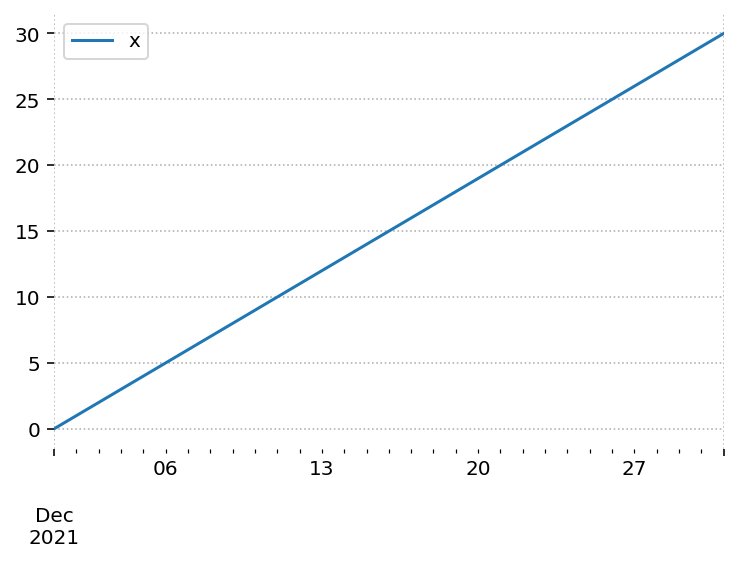

In [31]:
foo  = pd.DataFrame({"x":np.arange(31)}, index=pd.DatetimeIndex(pd.date_range("2021-12-01","2021-12-31")))
foo.plot()
f = plt.gca().xaxis.get_major_formatter()

In [32]:
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%b \'%y')

In [33]:
np.timedelta64(1,"D")

numpy.timedelta64(1,'D')

(19006.0, 20222.436875)

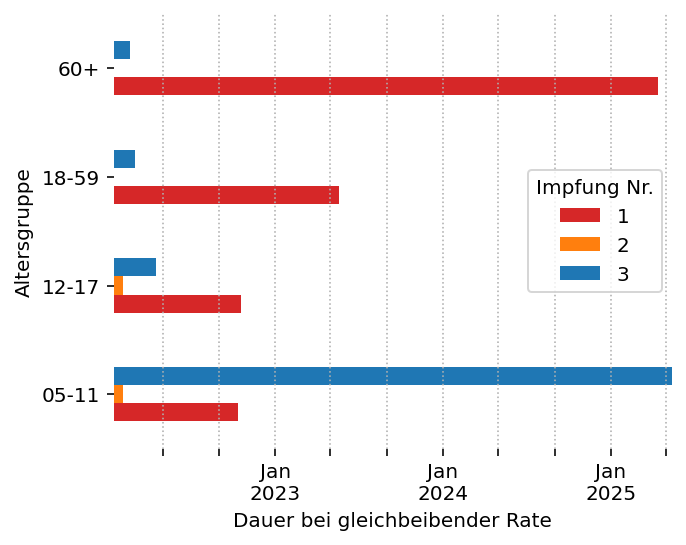

In [34]:
plt.rcParams['figure.facecolor']='white'
b = eta.plot.barh(figsize=(5,4),color=['C3','C1','C0'])
#date = pd.to_datetime(data.Impfdatum.values[-1]).strftime('%d.%m.%y')
plt.xlabel(f"Dauer bei gleichbeibender Rate")
plt.yticks(rotation=0)
plt.xlim((np.datetime64("today"),None))#eta.max().max()))
#plt.xlim((np.datetime64("today"),"2022-12-31"))#eta.max().max()))
plt.axvline(np.datetime64("2022-01-01"), color='gray')
plt.grid(axis='y', ls="")

plt.legend(title="Impfung Nr.")
plt.gca().xaxis.set_major_formatter(f)
plt.xlim((None, eta.loc["60+",1]+np.timedelta64(1,"M")))
#plt.gcf().autofmt_xdate()


In [35]:
missing_rel

Impfschutz,1,2,3
Altersgruppe,,,
05-11,4675441.0,454390.0,198166.0
12-17,1691623.0,256344.0,1997812.0
18-59,8697968.0,0.0,15376431.0
60+,3393796.0,0.0,4585590.0


In [36]:
rate

Impfschutz,1,2,3
Altersgruppe,,,
05-11,0.122642,0.037375,0.000188
12-17,0.621307,0.563921,0.116683
18-59,0.807452,0.807452,0.467062
60+,0.861562,0.861562,0.674510


Text(0.5, 1.0, 'Deutschland')

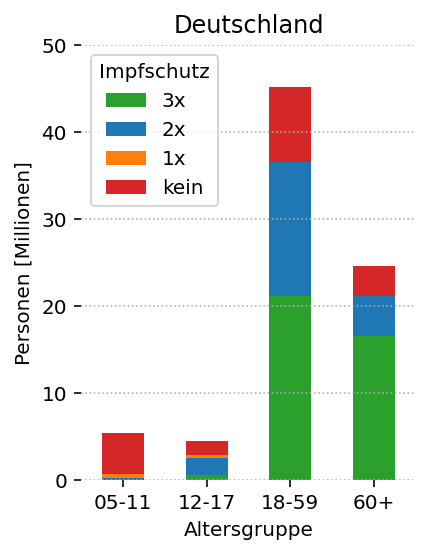

In [37]:
missing_rel.columns = ["kein", "1x", "2x"]
none = rate.loc[:,3] * pop_groups * 1000
none.name = "3x"
dist = pd.concat([missing_rel/1e6, none/1e6], axis=1)
dist.iloc[:,::-1].plot.bar(figsize=(3,4), stacked=True, width=0.5, color=['C3','C1','C0','C2'][::-1])
plt.ylabel(f"Personen [Millionen]")
plt.xticks(rotation=0)
plt.ylim((0,50))
plt.grid(axis='x', ls="")
plt.legend(title = "Impfschutz")
plt.title("Deutschland")

Text(0.5, 1.0, 'Deutschland')

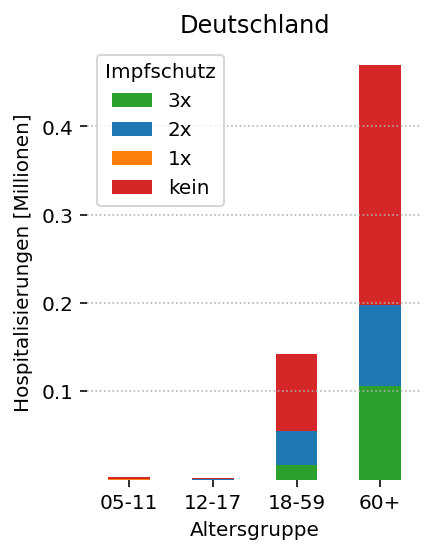

In [38]:
hosp_exp =(dist *  (hr.reshape(-1,1) * np.array([1, 0.5, 0.25, 0.08]).reshape(1,-1)))
hosp_exp.iloc[:,::-1].plot.bar(figsize=(3,4), stacked=True, width=0.5, color=['C3','C1','C0','C2'][::-1])
plt.ylabel(f"Hospitalisierungen [Millionen]")
plt.xticks(rotation=0)
#plt.ylim((0,50))
plt.grid(axis='x', ls="")
plt.legend(title = "Impfschutz")
plt.title("Deutschland")

In [39]:
hosp_exp.sum().sum() * 1000 / pop_groups.sum() 

0.007752253566126518

## England
Daten von NHS England

In [40]:
uk = pd.DataFrame({["1st dose","2nd dose","Booster and 3rd dose","Pop ONS"][i]:\
              pd.read_excel("https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2022/01/COVID-19-weekly-announced-vaccinations-06-January-2022.xlsx", 
              sheet_name=2 if i < 3 else 21,
              skiprows=[23,35,47,12][i],
              index_col=[1,2],
              nrows=1,
              engine="openpyxl").iloc[:,1:16].T.dropna().rename({'Under 18':'16-17'}).iloc[:,0]\
              for i in range(4)}).fillna(0)

In [41]:
uk

,1st dose,2nd dose,Booster and 3rd dose,Pop ONS
12-15,1413535,0.0,0.0,2677375
16-17,882186,654761.0,39987.0,1241048
18-24,3746219,3299841.0,1320257.0,4709589
25-29,3037115,2753395.0,1234535.0,3771493
30-34,3333457,3076958.0,1580059.0,3824652
35-39,3328606,3133423.0,1807697.0,3738209
40-44,3260068,3116329.0,2050902.0,3476303
45-49,3297320,3189502.0,2310942.0,3638639
50-54,3690505,3602573.0,2924537.0,3875351
55-59,3676585,3606714.0,3072760.0,3761782


In [42]:
uk['factor'] = np.array([0,0,1,1,1,1,1,1,1,1,2,2,2,2,2])

In [43]:
uk_group = uk.groupby('factor').sum(0)
uk_group.index=agg_avg.index[1:]
#uk_group["None"] = uk_group["Pop ONS"] - uk_group["1st dose"]

Text(0.5, 1.0, 'England')

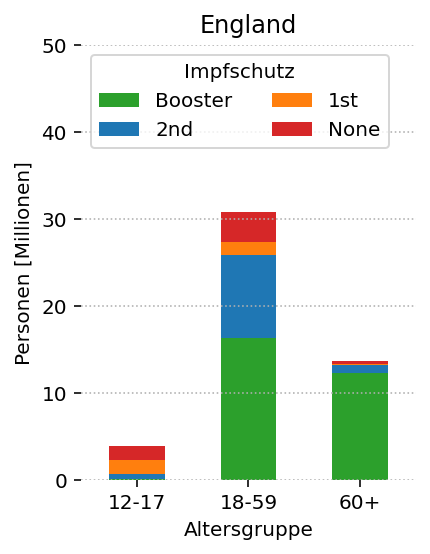

In [44]:
uk_missing = uk_group.iloc[:,:3].copy()
uk_missing["1st dose"] -= uk_missing["2nd dose"]
uk_missing["2nd dose"] -= uk_missing["Booster and 3rd dose"]
uk_missing["None"] = uk_group["Pop ONS"] - uk_group["1st dose"]
uk_missing = uk_missing.rename(columns={x:x.split()[0] for x in uk_missing.columns.values})
uk_dist = (uk_missing.iloc[:,[3,0,1,2]]/1e6)
uk_dist.iloc[:,::-1].plot.bar(figsize=(3,4), stacked=True, width=0.5, color=['C3','C1','C0','C2'][::-1])
plt.ylabel(f"Personen [Millionen]")
plt.xticks(rotation=0)
plt.ylim((0,50))
plt.grid(axis='x', ls="")
plt.legend(loc="upper left", title = "Impfschutz", ncol=2)
plt.title("England")

Text(0.5, 1.0, 'England')

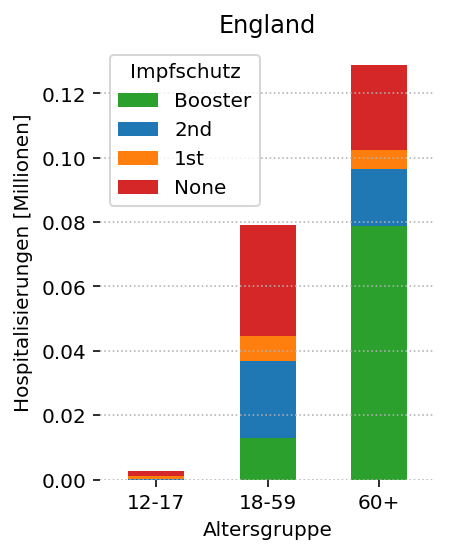

In [45]:
uk_hosp_exp = (uk_dist *  (hr[1:].reshape(-1,1) * np.array([1, 0.5, 0.25, 0.08]).reshape(1,-1)))
uk_hosp_exp.iloc[:,::-1].plot.bar(figsize=(3,4), stacked=True, width=0.5, color=['C3','C1','C0','C2'][::-1])
plt.ylabel(f"Hospitalisierungen [Millionen]")
plt.xticks(rotation=0)
#plt.ylim((0,50))
plt.grid(axis='x', ls="")
plt.legend(title = "Impfschutz")
plt.title("England")

In [46]:
uk_hosp_exp.sum().sum() * 1e6 / uk["Pop ONS"].sum()

0.00434572790648644

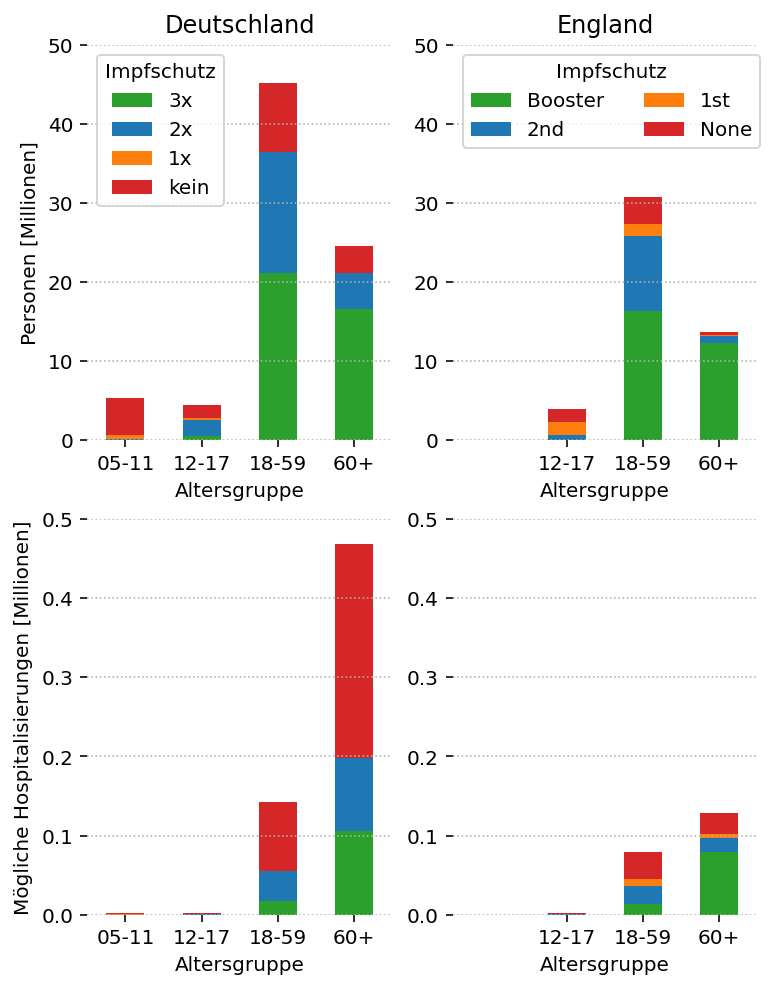

In [47]:
fig, ax = plt.subplots(2,2, figsize=(6,8))

dist.iloc[:,::-1].plot.bar(ax=ax[0,0], stacked=True, width=0.5, color=['C3','C1','C0','C2'][::-1])
ax[0,0].set_ylabel(f"Personen [Millionen]")
ax[0,0].set_ylim((0,50))
ax[0,0].grid(axis='x', ls="")
ax[0,0].legend(title = "Impfschutz")
ax[0,0].set_title("Deutschland")
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(),rotation=0)


hosp_exp.iloc[:,::-1].plot.bar(ax=ax[1,0], stacked=True, width=0.5, color=['C3','C1','C0','C2'][::-1])
ax[1,0].set_ylabel(f"Mögliche Hospitalisierungen [Millionen]")
#plt.ylim((0,50))
ax[1,0].grid(axis='x', ls="")
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(),rotation=0)
ax[1,0].set_ylim((0,0.5))
ax[1,0].get_legend().remove()

uk_dist.iloc[:,::-1].plot.bar(ax=ax[0,1], stacked=True, width=0.5, color=['C3','C1','C0','C2'][::-1])
ax[0,1].grid(axis='x', ls="")
ax[0,1].legend(loc="upper left", title = "Impfschutz", ncol=2)
ax[0,1].set_title("England")
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(),rotation=0)
ax[0,1].set_ylim((0,50))
ax[0,1].set_xlim(np.array(ax[0,0].get_xlim())-1)

uk_hosp_exp.iloc[:,::-1].plot.bar(ax=ax[1,1], stacked=True, width=0.5, color=['C3','C1','C0','C2'][::-1])
ax[1,1].set_ylim((0,0.5))
ax[1,1].grid(axis='x', ls="")
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(),rotation=0)
ax[1,1].set_xlim(np.array(ax[0,0].get_xlim())-1)
ax[1,1].get_legend().remove()


## Beobachtete Hospitaliserung England

In [48]:
hosp_uk = pd.read_csv("https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=cumAdmissionsByAge&format=csv", parse_dates=True).pivot(index="date", columns="age", values="value").iloc[:,[0,3,1,2,4]]
hosp_uk = hosp_uk.iloc[1:,:] - hosp_uk.iloc[:-1,:].values
hosp_uk = pd.DataFrame({"00_64":hosp_uk.iloc[:,:3].sum(1), "65+":hosp_uk.iloc[:,3:].sum(1)}, 
                      index= pd.DatetimeIndex(hosp_uk.index))

Text(0, 0.5, 'Hospitalisations since Dec 1, 2021')

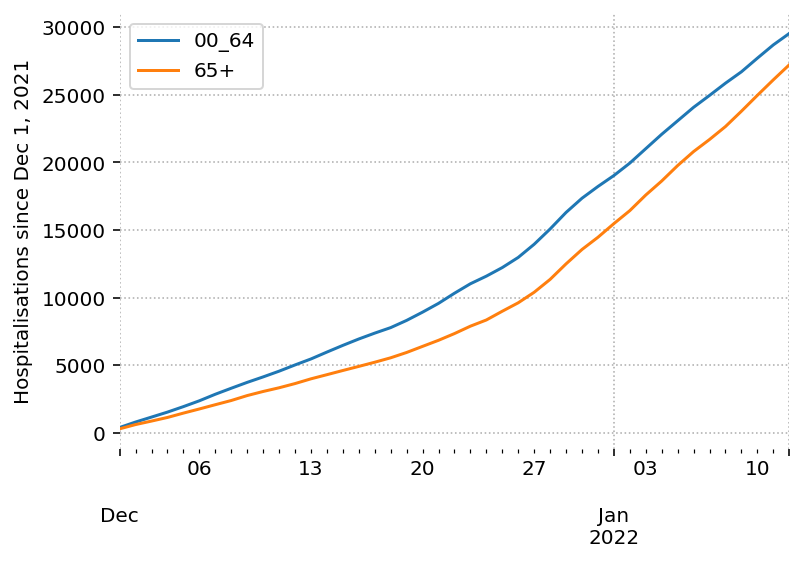

In [49]:
hosp_uk.loc["2021-12-01":,:].cumsum().plot(xlabel="")
plt.ylabel("Hospitalisations since Dec 1, 2021")

Text(0, 0.5, 'Fraction of hospitalisations')

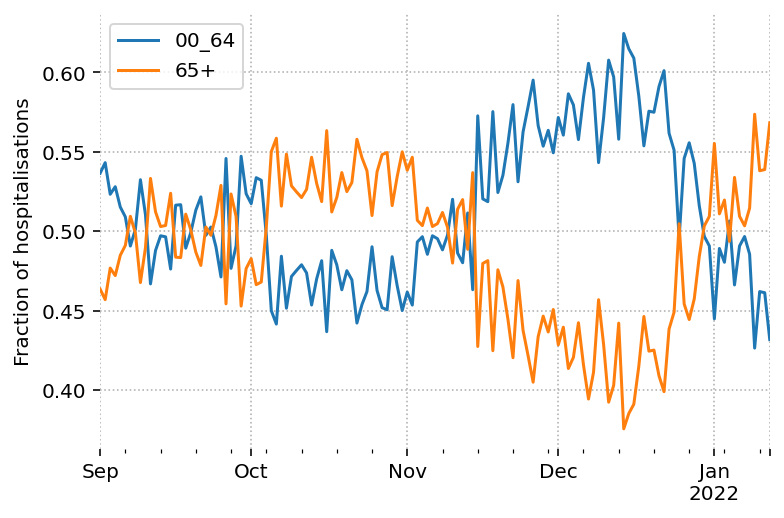

In [50]:
(hosp_uk / hosp_uk.sum(1).values[:,np.newaxis]).loc["2021-09-01":].plot(xlabel="")
hosp_uk
plt.ylabel("Fraction of hospitalisations")

In [51]:
cases_uk = pd.read_csv("https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=newCasesBySpecimenDateAgeDemographics&format=csv", parse_dates=True).pivot(index="date", columns="age", values="cases")[["00_59","60+"]]
cases_uk.index = pd.DatetimeIndex(cases_uk.index)
cases_uk

age,00_59,60+
date,,
2020-01-30,2,0
2020-01-31,0,0
2020-02-01,0,0
2020-02-02,0,0
2020-02-03,0,0
...,...,...
2022-01-05,140207,19822
2022-01-06,114555,16304
2022-01-07,79200,12817


In [52]:
def shift_date_index(df, shift):
    df = df.copy()
    df.index = df.index + shift
    return df

Text(0, 0.5, 'Hosp. to case ratio')

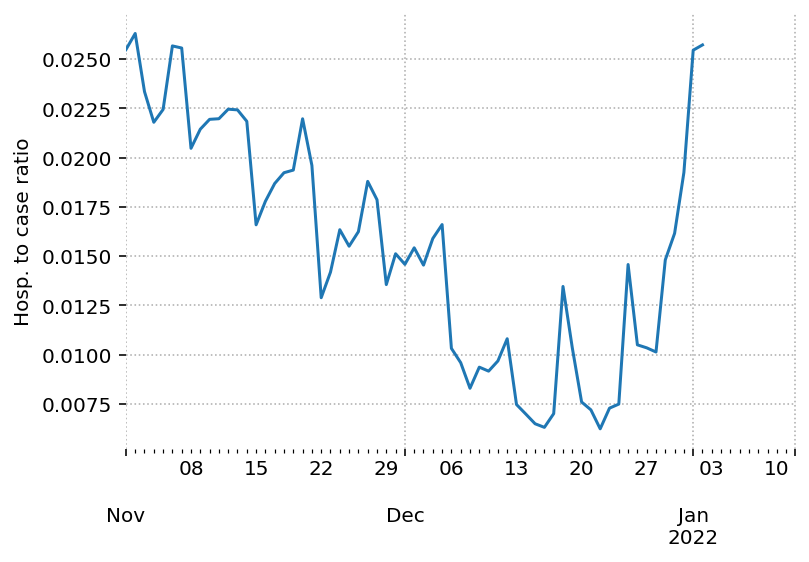

In [53]:
(hosp_uk.sum(1).iloc[7:]/shift_date_index(cases_uk, np.timedelta64(-7,"D")).sum(1)).loc["2021-11-01":].plot(xlabel="")
plt.ylabel("Hosp. to case ratio") 

In [54]:
hosp_uk.loc["2021-12-01":,:].sum(0)

00_64    29527
65+      27211
dtype: int64